#Importing Libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


## 1. Load and Inspect the Dataset

In [36]:
# Load the dataset from the local path
# Ensure that 'bank-additional-full.csv' is extracted and placed correctly
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check the shape of the dataset
print(f'\nDataset contains {df.shape[0]} records and {df.shape[1]} features.')

# Get a summary of numerical features
print("\nSummary of numerical features:")
print(df.describe())

# Get information about data types and non-null counts
print("\nData types and non-null counts:")
print(df.info())

First 5 rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.con

# 2. Data Cleaning

In [37]:
# Check for missing values
print("\nMissing values before replacement:")
print(df.isnull().sum())

# In this dataset, missing values are represented by 'unknown'
# Replace 'unknown' with NaN for easier handling
df.replace('unknown', pd.NA, inplace=True)

# Check missing values after replacement
print("\nMissing values after replacing 'unknown' with NaN:")
print(df.isnull().sum())

# Decide on a strategy to handle missing values
# For simplicity, we'll drop rows with missing values
df.dropna(inplace=True)

# Verify no missing values remain
print("\nMissing values after dropping rows with NaN:")
print(df.isnull().sum())


Missing values before replacement:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Missing values after replacing 'unknown' with NaN:
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                  

# 3. Feature Engineering

In [38]:
# Identify categorical columns (excluding the target variable 'y')
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('y')  # Exclude the target variable

# Perform One-Hot Encoding on categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Encode the target variable 'y' as binary
df_encoded['y'] = df_encoded['y'].map({'yes': 1, 'no': 0})

# Identify boolean columns resulting from get_dummies
bool_cols = df_encoded.select_dtypes(include=['bool']).columns.tolist()

# Convert boolean columns to integers
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Display the first few rows of the encoded dataframe
print("\nFirst 5 rows of the encoded dataframe:")
print(df_encoded.head())


First 5 rows of the encoded dataframe:
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   
6   59       139         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_may  month_nov  \
0          -36.4      4.857       5191.0  ...          1          0   
2          -36.4      4.857       5191.0  ...          1          0   
3          -36.4      4.857       5191.0  ...          1          0   
4          -36.4      4.857       5191.0  ...          1          0   
6          -36.4      4.857       5191.0  ...          1          0   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week

# 4. Feature Scaling

In [39]:
# Initialize the scaler
scaler = StandardScaler()

# Identify numerical columns
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
                  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                  'euribor3m', 'nr.employed']

# Fit and transform the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Verify scaling
print("\nScaled numerical features:")
print(df_encoded[numerical_cols].head())


Scaled numerical features:
        age  duration  campaign     pdays  previous  emp.var.rate  \
0  1.642253  0.005792 -0.559335  0.211887 -0.371616      0.727477   
2 -0.196452 -0.127944 -0.559335  0.211887 -0.371616      0.727477   
3  0.093870 -0.414520 -0.559335  0.211887 -0.371616      0.727477   
4  1.642253  0.181559 -0.559335  0.211887 -0.371616      0.727477   
6  1.932575 -0.460373 -0.559335  0.211887 -0.371616      0.727477   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0        0.804095       0.877451   0.786102     0.401648  
2        0.804095       0.877451   0.786102     0.401648  
3        0.804095       0.877451   0.786102     0.401648  
4        0.804095       0.877451   0.786102     0.401648  
6        0.804095       0.877451   0.786102     0.401648  


# 5. Exploratory Data Analysis (EDA)

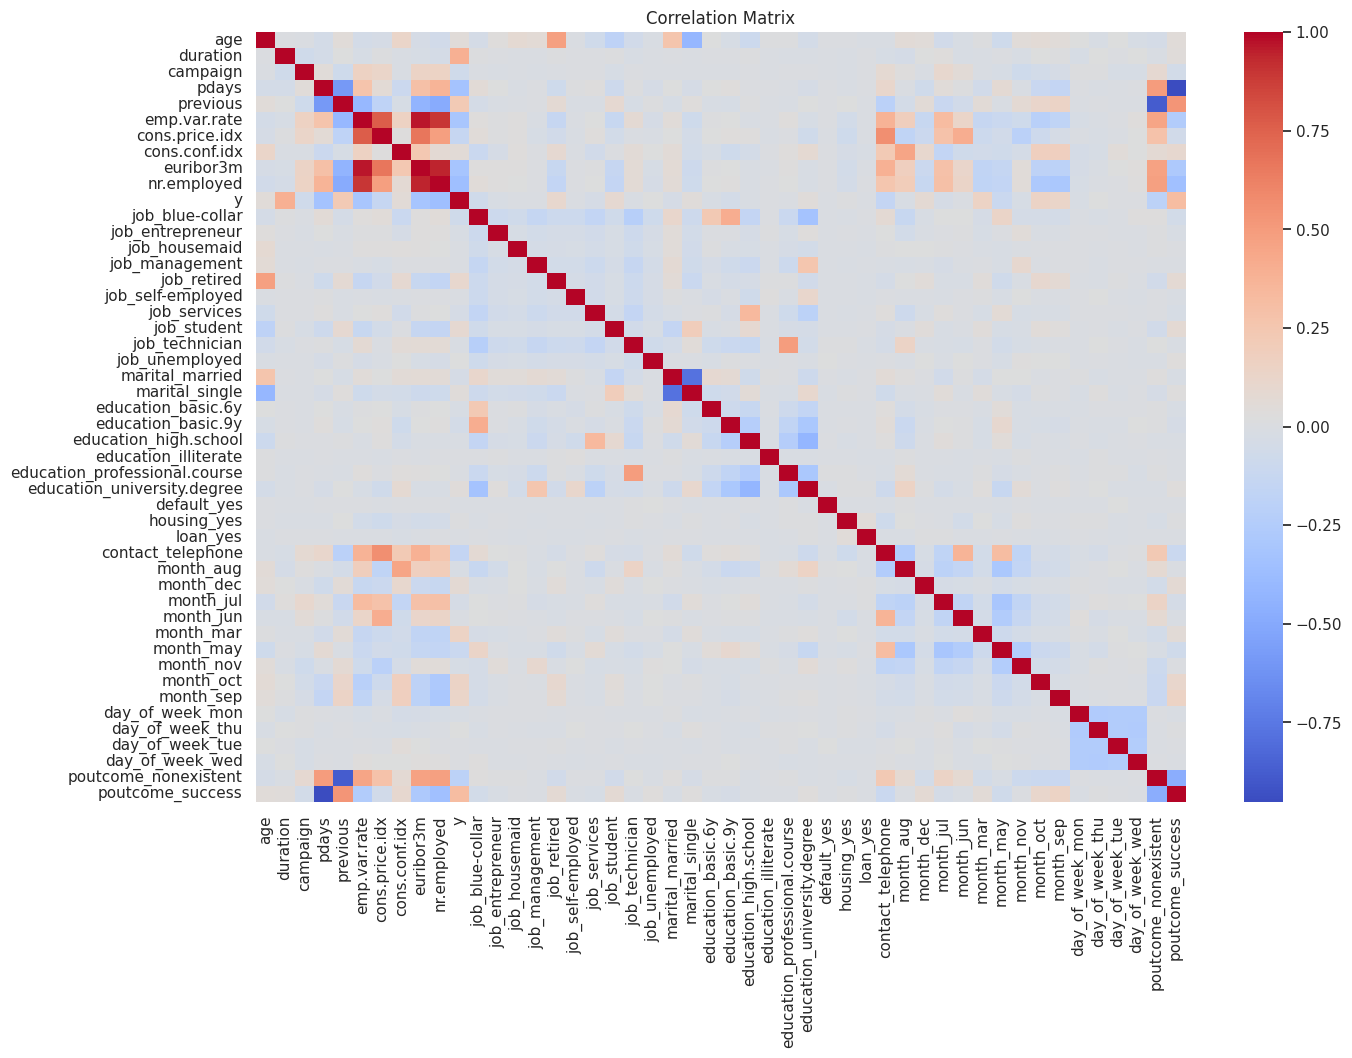

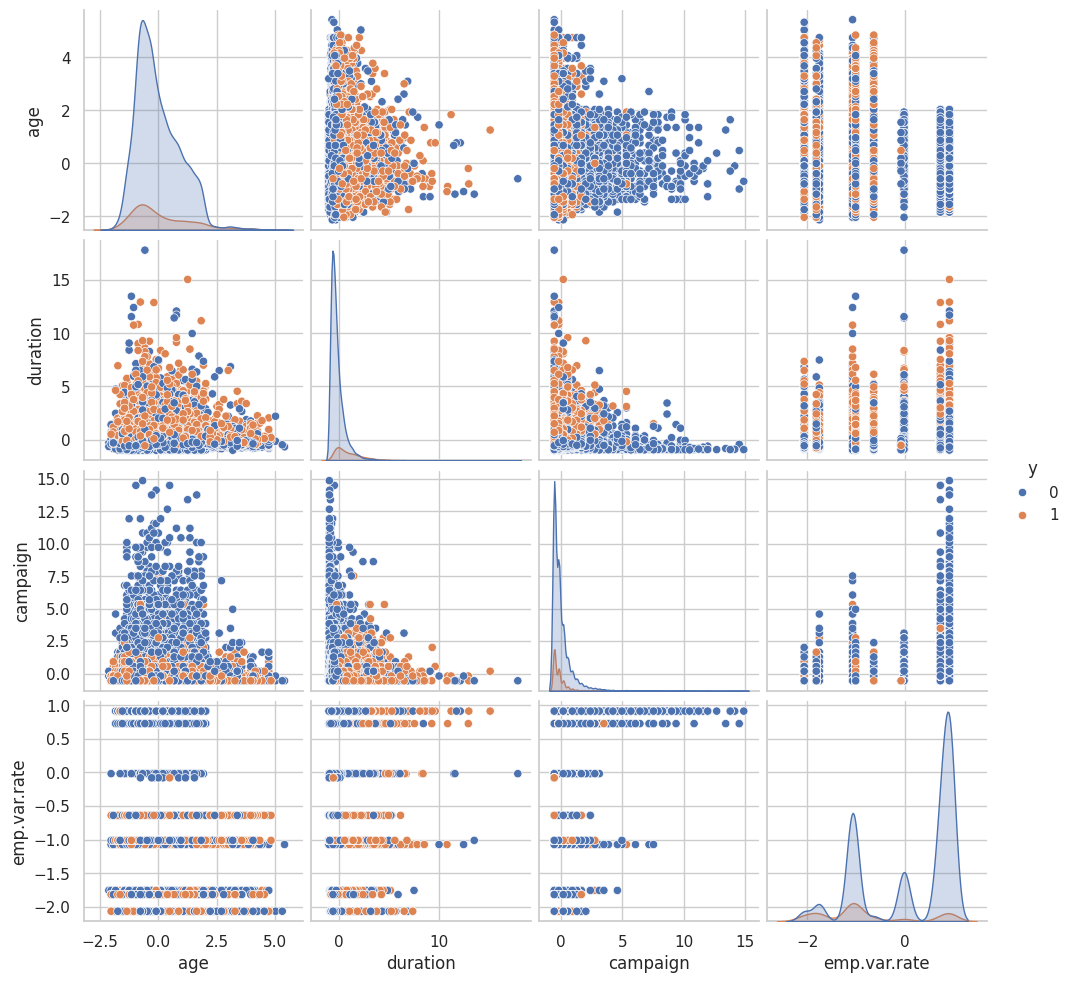

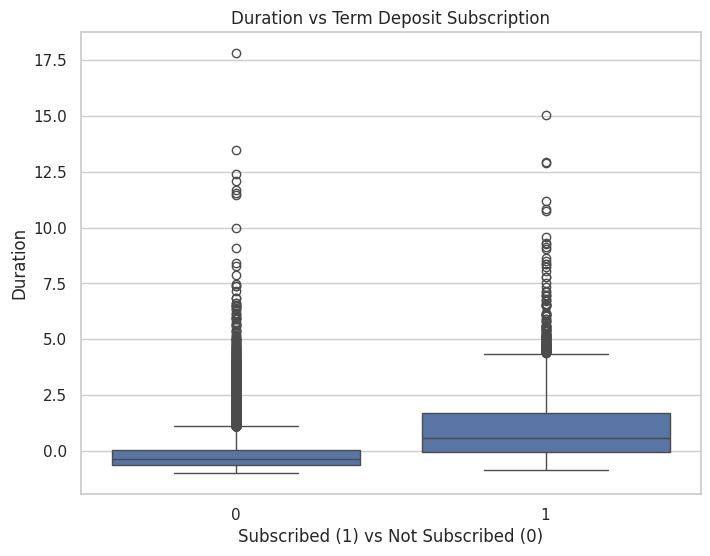

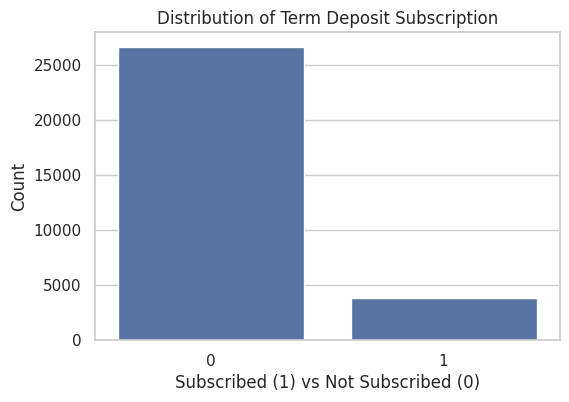


Count of each class in the target variable:
y
0    26629
1     3859
Name: count, dtype: int64

Percentage of 'Yes' (Subscribed): 12.66%
Percentage of 'No' (Not Subscribed): 87.34%


In [40]:
# Correlation Matrix
plt.figure(figsize=(15,10))
corr = df_encoded.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected features
selected_features = ['age', 'duration', 'campaign', 'emp.var.rate', 'y']
sns.pairplot(df_encoded[selected_features], hue='y')
plt.show()

# Boxplot for 'duration' vs 'y'
plt.figure(figsize=(8,6))
sns.boxplot(x='y', y='duration', data=df_encoded)
plt.title('Duration vs Term Deposit Subscription')
plt.xlabel('Subscribed (1) vs Not Subscribed (0)')
plt.ylabel('Duration')
plt.show()

# Distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df_encoded)
plt.title('Distribution of Term Deposit Subscription')
plt.xlabel('Subscribed (1) vs Not Subscribed (0)')
plt.ylabel('Count')
plt.show()

# Calculate and display the percentage of each class
subscription_counts = df_encoded['y'].value_counts()
print("\nCount of each class in the target variable:")
print(subscription_counts)
print(f"\nPercentage of 'Yes' (Subscribed): {subscription_counts[1] / subscription_counts.sum() * 100:.2f}%")
print(f"Percentage of 'No' (Not Subscribed): {subscription_counts[0] / subscription_counts.sum() * 100:.2f}%")


# 6. Model Training and Evaluation

In [41]:
# Define features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy * 100:.2f}%\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(class_report)


Model Accuracy: 89.82%

Confusion Matrix:
[[5108  196]
 [ 425  369]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5304
           1       0.65      0.46      0.54       794

    accuracy                           0.90      6098
   macro avg       0.79      0.71      0.74      6098
weighted avg       0.89      0.90      0.89      6098



In [47]:
from sklearn.model_selection import RandomizedSearchCV

# Reduced parameter grid
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [5, 10]
}

# Use RandomizedSearchCV for faster results
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=10, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit Randomized Search to the training data
random_search.fit(X_train, y_train)

# Best Parameters from Randomized Search
print(f'\nBest Parameters from Randomized Search: {random_search.best_params_}')

# Best Model from Randomized Search
best_model = random_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f'\nBest Model Accuracy: {best_accuracy * 100:.2f}%\n')

# Confusion Matrix and Classification Report
print('Confusion Matrix for Best Model:')
print(confusion_matrix(y_test, y_pred_best))
print('\nClassification Report for Best Model:')
print(classification_report(y_test, y_pred_best))

# Save Randomized Search Results to CSV
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('random_search_results.csv', index=False)
print("\nRandomized search results saved to 'random_search_results.csv'")


Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters from Randomized Search: {'n_estimators': 150, 'min_samples_split': 10, 'max_depth': None}

Best Model Accuracy: 90.18%

Confusion Matrix for Best Model:
[[5136  168]
 [ 431  363]]

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5304
           1       0.68      0.46      0.55       794

    accuracy                           0.90      6098
   macro avg       0.80      0.71      0.75      6098
weighted avg       0.89      0.90      0.89      6098


Randomized search results saved to 'random_search_results.csv'


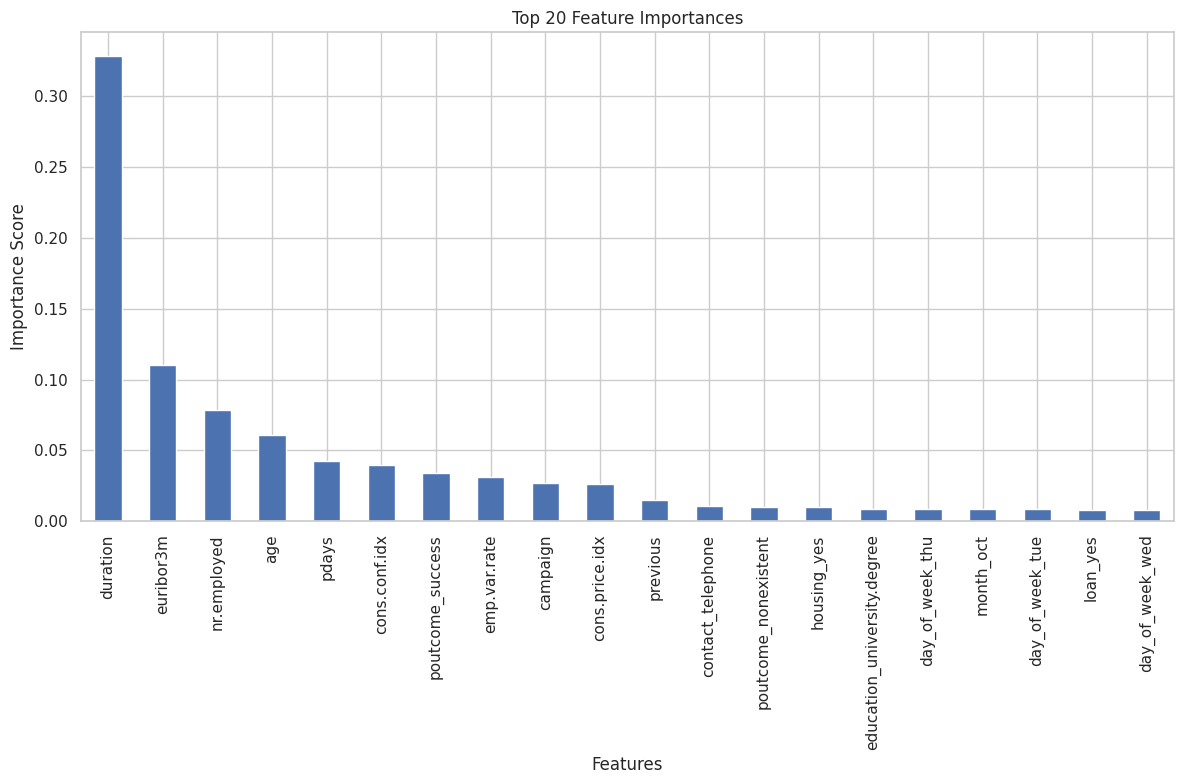

In [49]:
# Feature Importance
importances = best_model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12,8))
feature_importances.head(20).plot(kind='bar')
plt.title('Top 20 Feature Importances')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show()



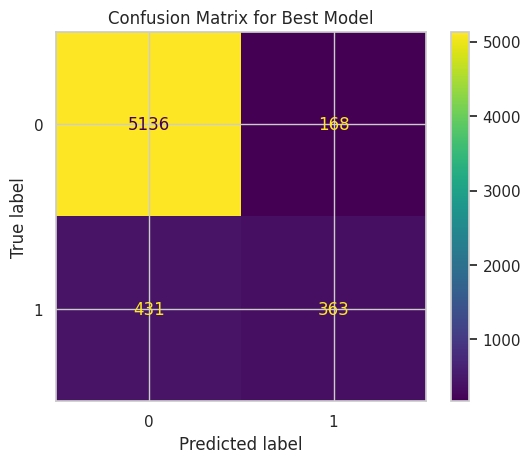

In [50]:
# Confusion Matrix Visualization
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title('Confusion Matrix for Best Model')
plt.show()